# Desafio Técnico Etapa 1 - Aleon

Neste arquivo colocarei toda a preparação e passo a passo do desenvolvimento deste desafio, o qual é referente ao planejamento, escolha dos dados e o que se diz, *Storytelling* deste programa. Aqui contextualizarei o motivo da escolha dos dados e toda a narração e descrição do processo analítico.
```py
```

### Objetivo deste Desafio

1. Extrair dados de uma dessas API: Marvel, NASA, Gutendex, FDA, PokeAPI, Senado Federal
2. Formatar os dados desta API de forma tabular utilizando a biblioteca Pandas
3. Criar gráficos, análises, tabelas, sobre os dados extraídos, utilizando quaisquer bibliotecas (Seaborn. Matplotlib, etc). De 3 a 6 itens.
```py
```

### Minhas informações: Candidato João Pedro Fernandes

**Nome:** João Pedro Fernandes \
**Idade:** 20 anos, nasci em 08/01/2004 \
**Curso:** Bacharelado em Física Computacional na USP em São Carlos (Previsão de formatura: dez/2026) \
**Celular:** +55 16 99993-0311 \
**E-mail:** joao.cobblepot7@gmail.com \
**GitHub:** https://github.com/JonnCobblepot \
**LinkedIn:** [www.linkedin.com/in/joão-pedro-fernandes-1aa333268](https://www.linkedin.com/in/jo%C3%A3o-pedro-fernandes-1aa333268/) 
```py
```

### Primeiro Passo: Versionamento (Git)

Inicialmente, utilizei os comandos: `git init`, `git add .`, `git commit -m "descrição"`. Estes são responsáveis por inicializar o repositório, adicionar o arquivo na área de stage e depois salvar as alterações, respectivamente.

Após isso, criei no meu GitHub um repositório chamado Desafio-Tecnico-Etapa-1--Aleon, e assim vinculei com a minha máquina e enviei ao repositório do GitHub as alterações do projeto com os seguintes comandos: `git remote add origin https://github.com/JonnCobblepot/Desafio-Tecnico-Etapa-1--Aleon`, `git push origin main`.

O link do repositório que criei para desenvolver este projeto e ter o versionamento e controle de versão de seu projeto é o que se segue: \
https://github.com/JonnCobblepot/Desafio-Tecnico-Etapa-1--Aleon 

Assim, com tais comandos do Git, vou desenvolvendo passo a passo este desafio técnico.
```py
```

### Escolha da API MARVEL

Após verificar os possíveis sites com suas APIs, decidi escolher o API MARVEL. Primeiramente por um interesse pessoal, que sou muito fã da MARVEL e os super-heróis desde criança, e segundo porque entrei no site e vi que era de fácil acesso e visualização dos dados.

Com isso criei minha conta gratuita no _MyDisney_ referente ao site https://developer.marvel.com e li toda a documentação interativa da API. Como um grande fã, consegui ver ali a possibilidade de navegar entre os personagens, seus nomes e IDs, além de suas aparições em quadrinhos, desenhos, filmes e séries, e isso contribuiu para a minha escolha dessa API. Afinal também, é o gosto do cliente (no caso, eu mesmo), mesmo se fosse difícil eu ainda escolheria esse.

Após colocar minhas informações no site, obtive minha `public key` e `private key`, as quais são utilizadas para autenticação entre cliente e servidor para poder acessar os dados.

Em relação ao servidor, para testar os endpoints, seguindo o que está na documentação, precisa de 3 parâmetros:
- `apikey:` passagem para a Marvel da sua chave pública
- `ts:` registro de data e hora que se altera a cada solicitação
- `hash:` um parêmetro que utiliza das informações de chave privada e pública, além do ts, resumindo a autenticação. (o valor de hash é o resumo md5(ts+privateKey+publicKey)).

O parâmetro ts tem que ser calculado na hora da aplicação, e o hash deve ser calculado pela concatenação dos outros parâmetros. Para posteriormente ser usado numa chamada de exemplo, substituindo nos locais adequados:

`http://gateway.marvel.com/v1/public/comics?ts=COLOCA_TS&apikey=COLOCA_PUBLIC_KEY&hash=COLOCA_HASH`

Para poder obter os parâmetros ts e hash, calculei numa fórmula simples em Python e pesquisando vi que há uma biblioteca para hash, que facilitou na manipulação das informações:


In [3]:
import hashlib
import time

# Chaves publicas e privadas (coloquei as minhas para obter meus parêmtros e testar o endpoint)
PUBLIC_KEY = ""
PRIVATE_KEY = ""

# Valor do ts (timestamp) sendo a data e horário atual
ts = str(time.time())

# Soma para concatenar no hash
soma_hash = ts + PRIVATE_KEY + PUBLIC_KEY

# Gerando o hash pelo md5 visto na documentação da Marvel
hash = hashlib.md5(soma_hash.encode()).hexdigest()

# Printando os valores
print("ts:", ts)
print("Hash:", hash)

ts: 1734579218.2950974
Hash: 974d7340b1ccd17beac903a7c645bd17


Dentro dos endpoints disponíveis para pegar (GET), eu escolhi o dos personagens (characters) dado o acesso público: `/v1/public/characters`. No exemplo dado na documentação `http://gateway.marvel.com/v1/public/comics.....` eu então substituiria 'comics' por 'characters'. Assim, colocando isso e os parâmetros mencionados, é gerada a URL de requisição ao servidor.

Com isso, finalmente tenho acesso aos dados, e como o próprio nome já diz API = Application Programming Interface, conectamos ao sistema da Marvel para obter seus dados, autentificando através dos parêmetros para que somente devs autorizados o utilizem. A URL gerada é uma requisição HTTP, sendo o endereço que os servidores da Marvel de onde eu estou tirando os dados entende quem está fazendo isso (no caso, eu) e quais dados estou vendo deles e utilizando.

Antes de implementar o código para manipulação dos dados, é testada a URL no próprio navegador para ver se está retornando os dados. E tudo funcionou corretamente com os dados acessíveis. Não coloco aqui o printscreen da tela porque há informações sensíveis que não devem ser compartilhadas, como principalmente a chave privada.
```py
```

### URL da Requisição da API da Marvel

Agora é a etapa de realizar a requisição através do código. Então primeiramente, transformei a manipulação de parâmetros em uma função que será utilizada, retornando a URL da Requisição da API da Marvel. O código ficou da seguinte forma:

In [6]:
import hashlib
import time

def generate_parameter():

    # Chaves publicas e privadas (coloquei as minhas para obter meus parâmetros e testar o endpoint)
    PUBLIC_KEY = "...coloque aqui sua chave pública..."
    PRIVATE_KEY = "...coloque aqui sua chave privada..."

    # Valor do ts (timestamp) sendo a data e horário atual
    ts = str(time.time())

    # Soma para concatenar no hash
    soma_hash = ts + PRIVATE_KEY + PUBLIC_KEY

    # Gerando o hash pelo md5 visto na documentação da Marvel
    hash = hashlib.md5(soma_hash.encode()).hexdigest()

    URL = f'http://gateway.marvel.com/v1/public/characters?limit=10&ts={ts}&apikey={PUBLIC_KEY}&hash={hash}'

    return URL

# Printando os valores
#print("ts:", ts)
#print("Hash:", hash)
#print("apikey:", PUBLIC_KEY)
print("URL:", generate_parameter())

URL: http://gateway.marvel.com/v1/public/characters?limit=5&ts=1734580996.1423204&apikey=f957679ebe331b5cb3de7d6bc8531e39&hash=e1b0106d86330fff6660bdd257513029


Eu apenas não coloquei as minhas chaves (PUBLIC_KEY e PRIVATE_KEY) aqui expostas, entretanto o código está testado e funcionando, obtendo a URL de requisição corretamente, conforme pode-se ver na saída que deixei desta célula do código, com a URL formada, a qual pode ser conferida requisição.

Agora, para conferir a requisição, utilizarei finalmente a biblioteca **requests** e assim envia tais requisições e abstrai dados do servidor.

 **ATENÇÃO:**

Eu demorei nesta parte do código por dois motivos.
- O primeiro motivo é que a biblioteca requests não estava sendo compatível com a minha versão do Python. Entretanto, ela funcionou na versão _Python 3.12.2_ e assim consegui continuar no desenvolvimento do código.

- O segundo motivo é referente a URL gerada. Na documentação da API da Marvel, é colocado como exemplo de URL iniciando com o protocolo 'https, o qual é um protocolo de Internet utilizado para enviar dados de forma segura (Hypertext Transfer Protocol Secure). E eu entendo a utilização dele, ele possui um viés de segurança e garante uma conexão segura entre o cliente e o servidor, no caso eu tentando conectar com a API para acessar seus dados, e com isso ele autentifica a requisição e a certifica também. Entretanto começou a dar muitos erros na saída, referentes ao SSL do servidor, o qual é um certificado que garante a integridade e a segurança tanto dos dados, quanto de ambas as partes da conexão. Tentei resolver este problema de inúmeras formas e nada funcionava. Então tive a ideia de substituir o 'https' da URL pelo 'http', e assim eu removi a necessidade de criptografar e certificar a conexão. É claro que essa mudança torna a conexão insegura, porém foi o jeito que encontrei de resolver este problema. E é claro também que o ideal seria utilizar o 'https', mas este é um problema a se resolver posteriormente, visto que não sei por agora o motivo da certificação e criptografia do vínculo do HTTP com o SLL estar dando erro. Neste código então, eu trabalharei com o HTTP na URL.

Abaixo se pode conferir a requisição, com uma estrutura condicional se tudo deu certo ou não.

In [7]:
import requests

# Obtendo a URL
URL = generate_parameter()

# Fzendo a requisição
response = requests.get(URL)

# Verificando se a requisição foi um sucesso ou não
if response.status_code == 200:
    data = response.json()  # Dados retornados pela API
    print("A Requisição URL foi um sucesso!")
else:
    print(f"A Requisição URL falhou. Erro na requisição: {response.status_code}")
    print(response.text)

A Requisição URL foi um sucesso!


Como pode-se ver na saída acima, a requisição URL foi um sucesso, o que significa que posso extrair os dados, acessá-los e trabalhar com eles.
```py
```

### Acessando os dados da API da Marvel

Para acessar os dados da API, os quais já obtivemos a requisição URL bem sucedida, tem-se que armazenar os valores privindos do JSON. Para essa extração dos dados, criei a função _extraction_data()_, adicionando a requisição URL dentro dela e já pegando os dados da API. Entratanto, quantos dados/personagens eu posso extrair para que eu utilize? Isso pela documentação e análise da requisição, pode ser definido na própria formação da URL. Assim, modifiquei como se vê a seguir, adicionando o parâmetro para quantidade de personagens (characters) que serão acessados:

```py
# Indica quantos personagens/dados serão requisitados
n_characters = str(10)

# Formatação e formação da URL de Requisição
URL = f'http://gateway.marvel.com/v1/public/characters?limit={n_characters}&ts={ts}&apikey={PUBLIC_KEY}&hash={hash}'
```
Como pode-se ver no exemplo acima, será mostrado na saída os 10 primeiros personagens.
Eu estou pegando o endpoint "characters", mas na API da Marvel não há só este, há "comics", "creators", "events" e outros que farão se obter outros tipos de dados.
Dando continuidade, abaixo está a função que me referi para extrair os dados:

In [2]:
# Função para extrair os dados da API da Marvel
def extraction_data():

    # Obtendo a URL
    URL = generate_parameter()

    # Fzendo a requisição
    response = requests.get(URL)

    # Verificando se a requisição foi um sucesso ou não
    if response.status_code == 200:

        # Dados retornados pela API
        data = response.json() 
        print("A Requisição URL foi um sucesso!")

        # Retorna os dados e seus resultados, extraídos do formato JSON da API
        return data['data']['results']
    
    else:
        print(f"A Requisição URL falhou. Erro na requisição: {response.status_code}")
        print(response.text)

        return None

Há uma condicional novamente e se foi um sucesso a requisição é então armazenado os dados. Na documentação interativa da API Marvel, há diversas classes que podem ser extraídas dos dados, como em relação aos personagens, se pode obter: nome, descrição, id, comics, series e muito mais. Para este caso, construí o output deste código para obter, por enquanto, o nome e a descrição dos personagens apenas, em ordem alfabética. Como pode se ver abaixo:

**ATENÇÃO:**

Não esqueça de colocar a sua chave pública e privada no código.

In [1]:
# Dados da Marvel (nesse caso, referente aos personagens/characters, mas poderia ser comics ou outro trocando na URL)
marvel_data = extraction_data()


# Verificando se os dados foram obtidos com sucesso
if marvel_data is not None and len(marvel_data) > 0:
    print("Dados extraídos com sucesso!")
    print("-----------------------------------PERSONAGENS MARVEL-----------------------------------")

    for character in marvel_data:
        print(f"Nome: {character['name']} \nDescrição: {character['description']}")
        print("----------------------------------------------------------------------------------------")

else:
    print("Falha ao extrair os dados!")

Dados extraídos com sucesso!
-----------------------------------PERSONAGENS MARVEL-----------------------------------
Nome: 3-D Man 
Descrição: 
----------------------------------------------------------------------------------------
Nome: A-Bomb (HAS) 
Descrição: Rick Jones has been Hulk's best bud since day one, but now he's more than a friend...he's a teammate! Transformed by a Gamma energy explosion, A-Bomb's thick, armored skin is just as strong and powerful as it is blue. And when he curls into action, he uses it like a giant bowling ball of destruction! 
----------------------------------------------------------------------------------------
Nome: A.I.M. 
Descrição: AIM is a terrorist organization bent on destroying the world.
----------------------------------------------------------------------------------------
Nome: Aaron Stack 
Descrição: 
----------------------------------------------------------------------------------------
Nome: Abomination (Emil Blonsky) 
Descrição: Fo

Como pode-se ver na saída acima, tudo funcionando corretamente no código! Assim temos com sucesso o acesso e extração dos dados da API da Marvel
```py
```

### Formatando os dados da API Marvel de forma tabular utilizando a biblioteca _Pandas_

Eu havia formatado os dados na própria saída mesmo, como visto no output acima, entretanto, para melhor organização e manipulação dos dados, seguindo também um dos requisitos deste desafio de código, utilizarei a biblioteca _Pandas_.
Vou adicionar mais classes aos dados, agora estarei mostrando o id, o nome, a descrição (breve história do personagem) e data da última modificação deste dado da API.
Assim, segue abaixo a estrutura que utilizei para mostrar os dados de forma tabular com _Pandas_:

In [3]:
import pandas as pd


# Verificando se os dados foram obtidos com sucesso e caso sim, os mostra na saída, agora de forma tabular
if marvel_data is not None and len(marvel_data) > 0:
    print("Dados extraídos com sucesso!")
    print("-----------------------------------PERSONAGENS MARVEL-----------------------------------")

    # Uma list comprehension já adiantando a parte de simplificação do código, aqui a respeito da renomeação das classes dos characters
    marvel_table = [{"ID": character['id'], "Nome": character['name'], "Descrição": character['description'], "Modificado em": character['modified']}
        for character in marvel_data]

    # Passando para um DataFrame do Pandas
    df_marvel = pd.DataFrame(marvel_table)

    # Mostrando os dados na tela de forma tabular
    print("\nDados na formatação tabular com pantas:")
    print(df_marvel)

else:
    print("Falha ao extrair os dados!")

Dados extraídos com sucesso!
-----------------------------------PERSONAGENS MARVEL-----------------------------------

Dados na formatação tabular com pantas:
        ID                        Nome  \
0  1011334                     3-D Man   
1  1017100                A-Bomb (HAS)   
2  1009144                      A.I.M.   
3  1010699                 Aaron Stack   
4  1009146  Abomination (Emil Blonsky)   
5  1016823      Abomination (Ultimate)   
6  1009148               Absorbing Man   
7  1009149                       Abyss   
8  1010903   Abyss (Age of Apocalypse)   
9  1011266                Adam Destine   

                                           Descrição             Modificado em  
0                                                     2014-04-29T14:18:17-0400  
1  Rick Jones has been Hulk's best bud since day ...  2013-09-18T15:54:04-0400  
2  AIM is a terrorist organization bent on destro...  2013-10-17T14:41:30-0400  
3                                                     

Como pode-se perceber acima, foi tudo tabulado certinho utilizando o _Pandas_. Como os dados referente a cada classe do personagem é grande, então na saída acabou pulando uma linha/tabela para mostrar as outras colunas, mas seguindo o mesmo índice, do 0 ao 9 (10 personagens.)
```py
```

### Modificando a formatação da data e hora de 'modified' dos personagens da API Marvel

Eu não havia gostado muito dessa formatação da última modificação do dado/personagem, então decide modificá-la também em relação ao Brasil, a formatação que nós utilizamos. Assim, apenas alterei utilizando o pandas e a datatime, ficando da seguinte forma:

In [5]:
import pandas as pd


# Verificando se os dados foram obtidos com sucesso e caso sim, os mostra na saída, agora de forma tabular
if marvel_data is not None and len(marvel_data) > 0:
    print("Dados extraídos com sucesso!")
    print("-----------------------------------PERSONAGENS MARVEL-----------------------------------")

    # Uma list comprehension já adiantando a parte de simplificação do código, aqui a respeito da renomeação das classes dos characters
    marvel_table = [{"ID": character['id'], "Nome": character['name'], "Descrição": character['description'], "Modificado em": character['modified']}
        for character in marvel_data]

    # Passando para um DataFrame do Pandas
    df_marvel = pd.DataFrame(marvel_table)

    #! Alterando a formatção de 'modified'
    df_marvel['Modificado em'] = pd.to_datetime(df_marvel['Modificado em'], utc=True).dt.strftime('%d/%m/%Y %H:%M:%S')

    # Mostrando os dados na tela de forma tabular
    print("\nDados na formatação tabular com Pandas:")
    print(df_marvel)

else:
    print("Falha ao extrair os dados!")

Dados extraídos com sucesso!
-----------------------------------PERSONAGENS MARVEL-----------------------------------

Dados na formatação tabular com Pandas:
        ID                        Nome  \
0  1011334                     3-D Man   
1  1017100                A-Bomb (HAS)   
2  1009144                      A.I.M.   
3  1010699                 Aaron Stack   
4  1009146  Abomination (Emil Blonsky)   
5  1016823      Abomination (Ultimate)   
6  1009148               Absorbing Man   
7  1009149                       Abyss   
8  1010903   Abyss (Age of Apocalypse)   
9  1011266                Adam Destine   

                                           Descrição        Modificado em  
0                                                     29/04/2014 18:18:17  
1  Rick Jones has been Hulk's best bud since day ...  18/09/2013 19:54:04  
2  AIM is a terrorist organization bent on destro...  17/10/2013 18:41:30  
3                                                     01/01/1970 00:00:00 

Comparando com a saída anterior, essa agora está modificada para mostrar a data e o horário que foi modificado em relação ao Brasil, já adicionando os fusos que haviam na saída anterior.
```py
```

### Criação da main e desenvolvimento e extração do Ano de Modificação da classe 'modified'

Para antes começar com os gráficos, vou categorizar a main e deixá-la mais organizada, além disso, utilizarei nos gráficos o ano de modificação somente que pode ser usado nos eixos x e y dos gráficos, então já estou adiantando um processo que pode ser utilizado. Abaixo se encontra o código quanto a isso:

In [ ]:

#? Função principal para a execução do programa
def main():

    # Dados da Marvel (nesse caso, referente aos personagens/characters, mas poderia ser comics ou outro trocando na URL)
    marvel_data = extraction_data()

    # Verificando se os dados foram obtidos com sucesso e caso sim, os mostra na saída, agora de forma tabular    
    if marvel_data is not None and len(marvel_data) > 0:
        print("Dados extraídos com sucesso!")
        print("-----------------------------------PERSONAGENS MARVEL-----------------------------------")

        # Uma list comprehension já adiantando a parte de simplificação do código, aqui a respeito da renomeação das classes dos characters
        marvel_table = [{"ID": character['id'],
                         "Nome": character['name'],
                         "Descrição": character['description'],
                         "Modificado em": character['modified']}
                        for character in marvel_data]
        
        # Passando para um DataFrame do Pandas
        df_marvel = pd.DataFrame(marvel_table)

        # Alterando a formatação de 'modified'
        df_marvel['Modificado em'] = pd.to_datetime(df_marvel['Modificado em'], errors='coerce', utc=True)

        # Conseguindo somente o ano da modificação
        df_marvel['Ano de Modificação'] = df_marvel['Modificado em'].dt.year
        
        # Verificando quais personagens possuem ou não sua descrição
        df_marvel['Possui Descrição'] = df_marvel['Descrição'].apply(lambda x: 'Sim' if pd.notna(x) and x != '' else 'Não')


        # Mostrando os dados na tela de forma tabular
        print("\nDados na formatação tabular com Pandas:")
        print(df_marvel)

    else:
        print("Falha ao extrair os dados.")


#? Execução do programa
if __name__ == "__main__":
    main()

Nesta função 'main' está acrescentado todo o código já feito desde o começo, entretanto agora com a formatação da 'modified', a extração do ano de modificação e a separação dos personagens e contagem daqueles que possuem ou não sua descrição (resumo/história).
```py
```

### Criação de gráficos, análises e tabelas sobre os dados extraídos, utilizando Matplotlib

Eu decide utilizar o Matplotlib como ferramenta para a criação de gráficos e tabelas para a melhor visualização e análise dos dados para o usuário porque já possuo experiência com ele (utilizei em projetos e trabalhos da faculdade).

Segundo os dados de cada personagem da Marvel que estamos trabalhando, sendo seu ID, Nome, Descrição e Data e Horário de sua Modificação, decidi fazer as seguintes plotagens de gráficos para análises:

**ATENÇÃO:** Foi utilizado os 100 primeiros personagens da API Marvel, sendo definido na URL. 

##### **Gráfico de Barras: Plotagem por ano de modificação dos dados referentes aos personagens**

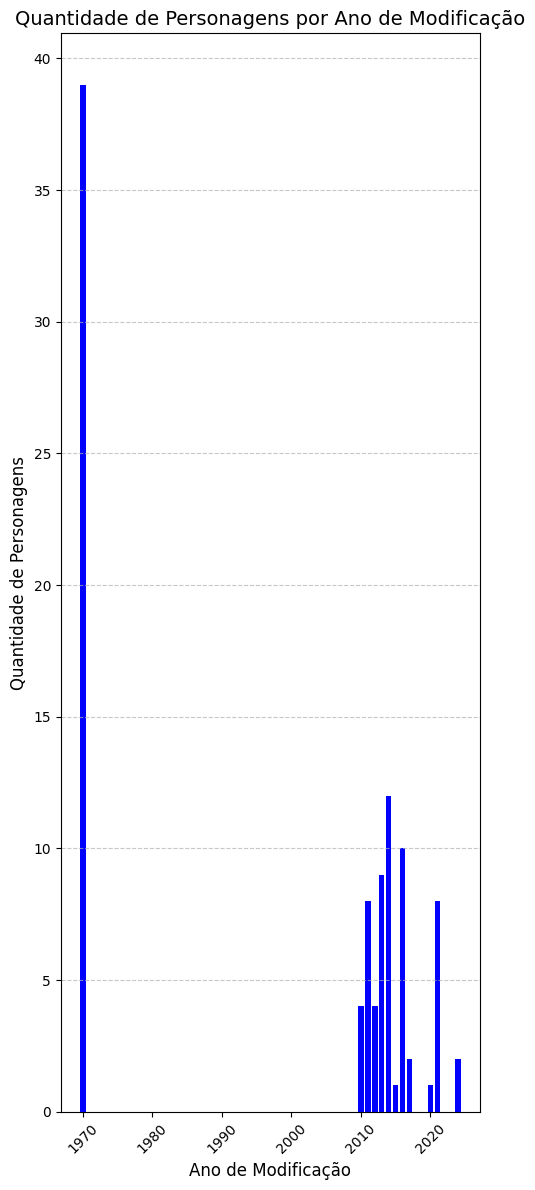

In [6]:
import matplotlib.pyplot as plt

#? Função para plotar o gráfico de contagem por ano de modificação
def plot_gBarra_contagem_por_ano(df):
    anos = df['Ano de Modificação'].value_counts().sort_index()
    plt.figure(figsize=(5, 12))
    plt.bar(anos.index, anos.values, color='blue')
    plt.title('Quantidade de Personagens por Ano de Modificação', fontsize=14)
    plt.xlabel('Ano de Modificação', fontsize=12)
    plt.ylabel('Quantidade de Personagens', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_gBarra_contagem_por_ano(df_marvel)

Aqui nós podemos visualizar (com os 100 primeiros personagens que pegamos na ordem alfabética) que a maioria das modificações ocorreram depois de 2010, mas no ano de 1970, quase dentro do mesmo período 40 personagens foram criados, dentre dos 100 avaliados. Com isso nós podemos analisar que foi a época que a Marvel começou a ganhar sucesso, na década de 70, pois foi nessa epóca que seus personagens mais famosos foram criados, como o Homem Aranha, Homem de Ferro, Hulk, Capitão América, Thor e com eles suas histórias e personagens que as compõe. Com isso analisamos essa quantidade de personagens criados de uma só vez na década de 70, mesmo analisando 100 de milhares de characters. Depois dos anos 2000 tivemos a explosão de fãs e o crescimento da Marvel na indústria cinematográfica, fazendo com novos desenvolvidos e personagens e modificações nos dados sejam realizadas. Isso é o que consegui inferir destes dados

##### **Gráfico de Pizza: Plotagem com percentual dos personagens que possuem ou não descrição (seu resumo/história)**

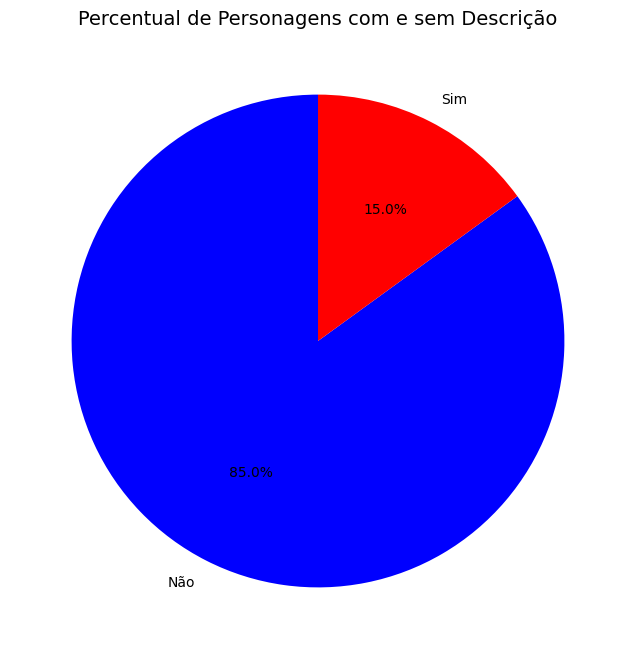

In [7]:

#? Função para plotar o gráfico de pizza com percentual dos personagens que possuem ou não descrição (seu resumo/história)
def plot_gPercentual_descricao(df):
    descricao_contagem = df['Possui Descrição'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(descricao_contagem, labels=descricao_contagem.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
    plt.title('Percentual de Personagens com e sem Descrição', fontsize=14)
    plt.show()

plot_gPercentual_descricao(df_marvel)

Através deste gráfico é possível averiguar a importância que alguns personagens da Marvel possui e outros que não. Nos dados da API, há a classe de descrição para cada personagem, porém muitos não a possuem, dado que foi analisado apenas 100 personagens, e destes, 85 não possuiam descrição. Ou seja, é possível analisar que não precisam de back story, ou que são na maioria das vezes personagens com poucas aparições ou algo assim. Já personagens relevantes para a trama e para o universo Marvel já possuem, como no caso do "Bomba A", o "Abominável", personagens que fazem parte da história do Hulk e são relevantes e estão estes dentro dos 15 personagens que possuem descrição segundo o gráfico.

##### **Gráfico de Dispersão: Plotagem para análise da coexistência ou não de uma relação entre ID e Ano**

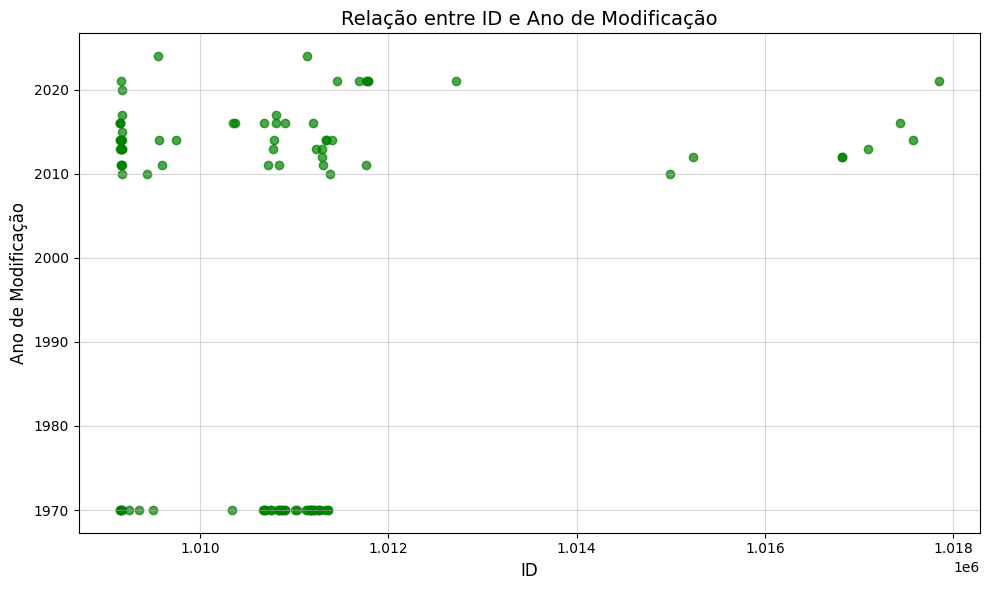

In [ ]:

#? Função para plotar o gráfico de dispersão para análise da coexistência ou não de uma relação entre ID e Ano 
def plot_gDispersao_id_ano(df):
    plt.figure(figsize=(10, 6))
    plt.scatter(df['ID'], df['Ano de Modificação'], alpha=0.7, color='green')
    plt.title('Relação entre ID e Ano de Modificação', fontsize=14)
    plt.xlabel('ID', fontsize=12)
    plt.ylabel('Ano de Modificação', fontsize=12)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_gDispersao_id_ano(df_marvel)

Todo personagem na API da Marvel possui um ID, eu quis criar este gráfico de dispersão que é melhor para visualizar a localização dos pontos que coincidem com seus respectivos anos. Tentei achar alguma correlação do ID quanto ao ano de modificação, porém não consegui encontrar. Olhei e tentei achar algum padrão no gráfico, mas não achei.
```py
```